<h1><center> Final Project  </center> </h1>
<h2><center> COMPSCI X433.3 Python for Data Analysis and Scientific Computing </center> </h2>
<h2><center> UC Berkeley - Extension</center> </h2>
<h3><center>     Prashant Chopalli </center> </h3>

# Introduction : IDENTIFICATION OF FACTORS AFFECTING FLIGHT DELAYS

Currently, the air transportation market is in the deepest crisis. The effects of the pandemic have left a huge impact on both airlines and airports. As the number of flights operated decreased significantly, airlines had to quickly change their development strategies in order to continue their activities. However, even despite a significant decrease in the number of flights, passengers continue to experience flight delays. For a more detailed study of this problem, it was decided to consider the causes of delays, which lead to various negative consequences.

Every year, due to flight delays, many airlines around the world suffer thousands and millions in losses. In turn, passengers experience significant inconvenience and thus suffer a variety of losses.

Each flight is operated at a specially allotted time according to the schedule in a dedicated slot for this flight. One of the main reasons for flight delays is adverse weather conditions. To take off and land, you need a relatively calm meteorological situation in the airport area. In addition to weather conditions, flight delays can occur due to the fault of the airline itself or the airport (service company). These reasons can be divided into technical and production (organizational). Production (organizational) reasons may be related to the airport. For example, due to the high traffic of aircraft on the apron or other reasons, i.e. forced waiting in parking lots for towing or taxiing operations. Technical related to malfunctions of the aircraft or airfield equipment. Delays due to the fault of the airline may be related to: 1)lack of an aircraft for this flight at the airport of departure (late arrival from the previous flight and lack of reserve aircraft), 2) waiting for transfer passengers from delayed flights upon arrival, failures of the check-in/landing system at the airport. 3) In some cases, delays arise due to unforeseen circumstances and for reasons beyond anyone's control.

# Problem  : 

In our project, we tried to research which factors affect to the flight delays to improve  management in airports and airlines. It helps to predict and avoid organizational resons of delay and keeps companies expenses.
For this perpose we create next researches:

+ Calculated total number of flight delays for each airline
+ Analysis of flight delays by months
+ Analysis of flight delays by day of the week
+ Analysis of the relationship between a block of the time range of the day and air delays
+ Study: which airport, depending on its geographical location and trafic, has more delays 
+ Analysis of how weather affects flight delays: snow and temperature at airports
+ Analysis of the timing block (block of the time range of the day) in relation to the delay
+ Developed a chart of the correlation matrix
+ Analysis segment number

# <h2> Data Source </h2>

<br>Original Data Source from Kaggle</br>
<a href=https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations> https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations </a>

The data set includes information about flight delays and consists of the following information:

+ MONTH - shows month when this event take a place
+ DAY_OF_WEEK when delay was happened
+ DEP_DEL15 Binary of a departure delay over 15 minutes (1 is yes)
+ DEP_TIME_BLK - Distance group to be flown by departing aircraft
+ DISTANCE_GROUP Distance group to be flown by departing aircraft
+ SEGMENT_NUMBER The segment that this tail number is on for the day
+ CONCURRENT_FLIGHTS - Concurrent flights leaving from the airport in the same departure block
+ NUMBER_OF_SEATS - Number of seats on the aircraft
+ CARRIER_NAME - Carrier
+ AIRPORT_FLIGHTS_MONTH - Avg Airport Flights per Month
+ AIRLINE_FLIGHTS_MONTH -Avg Airline Flights per Month
+ AIRLINE_AIRPORT_FLIGHTS_MONTH -Avg Flights per month for Airline AND Airport
+ AVG_MONTHLY_PASS_AIRPORT - Avg Passengers for the departing airport for the month
+ AVG_MONTHLY_PASS_AIRLINE - Avg Passengers for airline for month
+ FLT_ATTENDANTS_PER_PASS - Flight attendants per passenger for airline
+ GROUND_SERV_PER_PASS - Ground service employees (service desk) per passenger for airline
+ PLANE_AGE - Age of departing aircraft
+ DEPARTING_AIRPORT - Departing Airport
+ LATITUDE - Latitude of departing airport
+ LONGITUDE - Longitude of departing airport
+ PREVIOUS_AIRPORT - Previous airport that aircraft departed from
+ PREVIOUS_AIRPORT - Previous airport that aircraft departed from
+ SNOW - Inches of snowfall for day
+ SNWD - Inches of snow on ground for day
+ TMAX - Max temperature for day
+ AWND - Max wind speed for day

## Requirements

The following modules are required to run this program:

+ math
+ numpy as np
+ pandas as pd
+ matplotlib.pyplot as plt
+ seaborn as sns
+ folium
+ scipy as stats

## Description of Program
This program performs a number of functions. In the first few cells, we import the data set from a csv file, and then we run pandas commands to evaluate the size of the dataset and show sample of the dataset.

In the next sections, we perform slicing and reindexing commands to get the total number of delays by airline, month and day of the week. Visualizations are done for each analysis using Matplotlib library

We then analyze the relation between the deparature block and delays by grouping the data by deparature slots and finding the delay totals. We perform visualizations for these taks using Seaborn library

We then utilize Folium library to display data on the geographic map of US. We display the airports by most delays and the most heavily traffic airports. The airport delay rate is calculated for each airport on a monthly basis. This is done using pandas and Seaborn scatterplot is created to show delay rate for each airport

The impact of Snow and Temperature on delays is analyzed using pandas. We bin the snow and temperatue data into ranges and then group the data by smow/temp. Visualizations was done using seaborn

A correaltion matrix is created to see the relation between various features and delay. A bar plot is constructed to analyse affect of Segment number and Total Delays



In [1]:
# Import all the required libraries 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the .csv file into a dataset
dftemp=pd.read_csv('full_data_flightdelay.csv')

In [3]:
# Display the number of rows in the dataset
dftemp.shape

(6489062, 26)

# 

The dataset has 6.5 million rows of data. This is a fairly large dataset, to ease the Data Analysis process we used data only from the first half of the year.

In [4]:
# Filter data for the first 6 months
df=dftemp[dftemp['MONTH']<=6 ]

In [5]:
# Data is reduced to 3.1 million rows which is almost half of the original
df.shape

(3156348, 26)

We reduce the dataset up to 3.125 million rows for more comfortable work. The table below shows what kind of columns it has. 

In [6]:
# Display first few rows of the dataset
pd.set_option('display.max_columns',None)
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


# Total Flight Delays for each Airline

<Figure size 3600x2160 with 0 Axes>

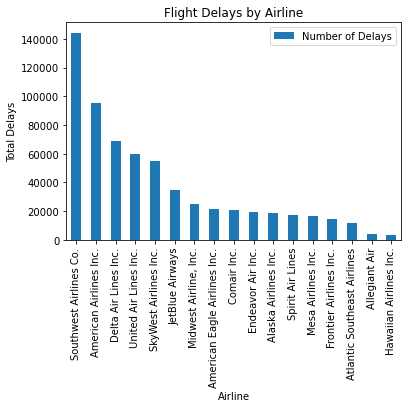

In [7]:
# Bar plot for Total flight delaysfor each Airline
df_time=df[['DEP_DEL15']].groupby(df['CARRIER_NAME']).sum().sort_values(by=['DEP_DEL15'],ascending=False)
df_time.columns=['Number of Delays']
df_time.head()
plt.figure(figsize=(50,30))
df_time.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Total Delays')
plt.title("Flight Delays by Airline")
plt.show()

As we can see on the graph, Southwest Airlines Co has the most delays, Hawaiian Airlines Inc has the fewest. Further we investigate the dependence of the number of delays on the month of flight

# Analysis of Flight Delays by Months


In [8]:
#http://localhost:8891/notebooks/Desktop/Berkeley/Final%20Project/project-airline.ipynb
        #Analyze-the-the-most-delays-by-months

# Group delay data by month and sort is descending order
df_delay_month=df[['DEP_DEL15']].groupby(df['MONTH']).sum().sort_values(by=['DEP_DEL15'],ascending=False)
df_delay_month


,DEP_DEL15
MONTH,
6,135871
5,113530
4,98757
2,98036
3,96589
1,87682


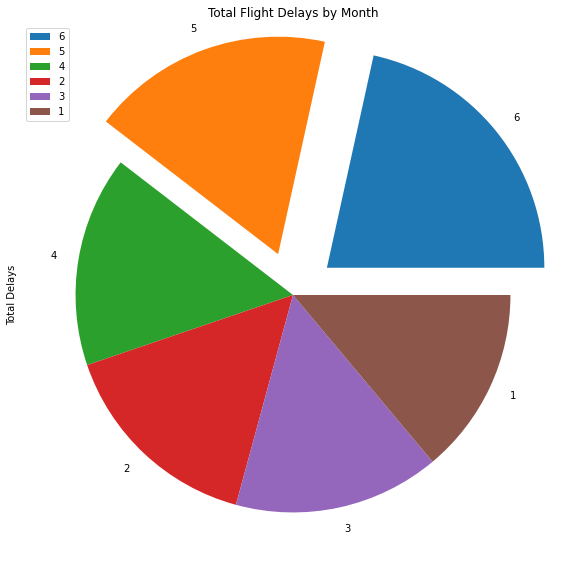

In [9]:
explode = (0.2,0.2,0,0,0,0)

df_delay_month.plot(kind='pie',y='DEP_DEL15',explode = explode, shadow=Trfigsize=(10,10))

plt.title('Total Flight Delays by Month')
plt.ylabel('Total Delays')
plt.show()



According to the graph, June and May have the most delays. The next step we trying to figure out which day week is more stressful for airlines.

# Analysis of Flight Delays by Day of the Week

In [10]:
# Group flight delays by day of the week and Sort values in descending order
df_day=df[['DEP_DEL15']].groupby(df['DAY_OF_WEEK']).sum().sort_values(by=['DEP_DEL15'],ascending=False)
df_day.columns=['Number of Delays']
df_day


,Number of Delays
DAY_OF_WEEK,
4,103333
5,101822
1,96017
7,93616
3,84999
2,80083
6,70595


<Figure size 576x576 with 0 Axes>

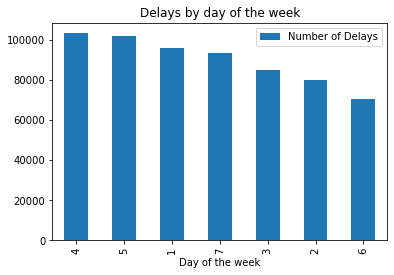

In [11]:
plt.figure(figsize=(8,8))
df_day.plot(kind='bar')
plt.title("Delays by day of the week")
plt.xlabel('Day of the week')
plt.show()

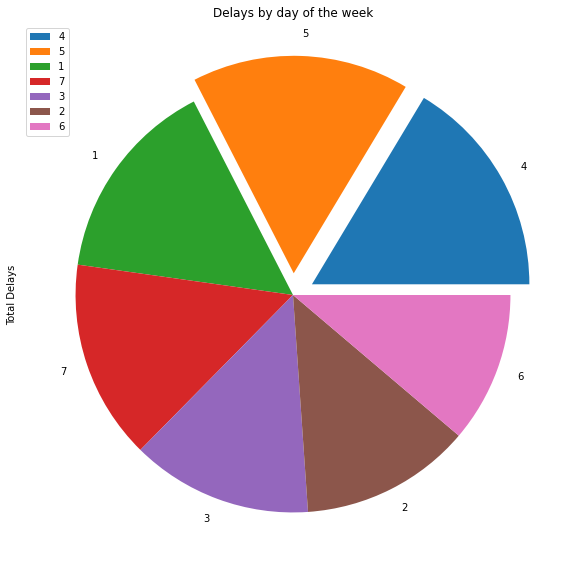

In [12]:
# Pie plot
explode=(0.1,0.1,0,0,0.0,0,0)
df_day.plot(kind='pie',y='Number of Delays',explode=explode,figsize=(10,10))
plt.title("Delays by day of the week")
plt.ylabel('Total Delays')
plt.show()

These results suggest that the majority of delays occur on Thursday, with Friday likely to have more passenger traffic ahead of the weekend.

# Analysis of the Relationship between a Block of the Time Range of the day and Air Delays

We divided the day into 18 time periods from 12.00 Pm to 6.00 Am and then an hour later. We calculated the number of delays in each time period.

In [15]:
# Group delay data by Deparature block
s_blk=df.groupby(['DEP_TIME_BLK' ])['DEP_DEL15'].sum()

# Convert Series to dataframe
df_blk=pd.DataFrame(s_blk)

# Reset index and sort values in Descending order
df_blk.reset_index(inplace=True)
df_blk.sort_values(by='DEP_DEL15',ascending=False)

,DEP_TIME_BLK,DEP_DEL15
13,1800-1859,53145
12,1700-1759,53140
14,1900-1959,51547
11,1600-1659,46345
15,2000-2059,46254
10,1500-1559,45249
9,1400-1459,42947
7,1200-1259,37434
8,1300-1359,36292
6,1100-1159,34049


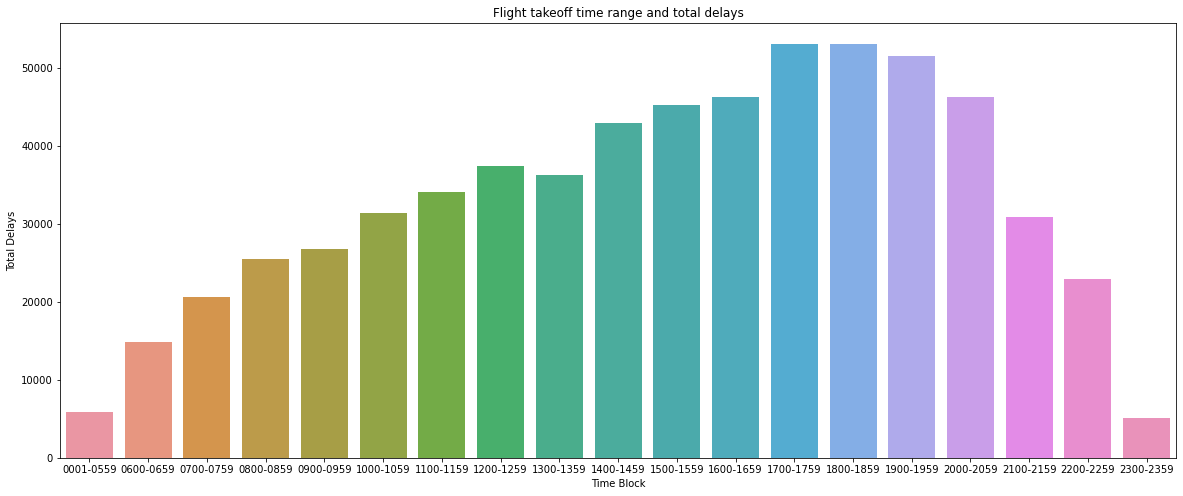

In [17]:
plt.figure(figsize=(20,8))
plt.title('Flight takeoff time range and total delays')
sns.barplot(data=df_blk,x=df_blk['DEP_TIME_BLK'],y='DEP_DEL15')
plt.xlabel('Time Block')
plt.ylabel('Total Delays')
plt.show()

As we can see from the above data, the largest number of flight delays occurs from 2.00 Pm to 09.00 Pm in the evening. This is probably due to the heavy workload of airports.

In [18]:
! pip install folium

# Which Airport, Depending on its Geographical Location and Trafic , has more Delays


We are going to investigate how the location of the departure airport affects the number of delayed flights. To do this, we analyze the latitude and longitude of the geographic location of the airport and below display a table showing the 10 airports with the most delays.

In [19]:
import folium
import matplotlib.pyplot as plt

In [20]:
# Slice the dataframe with only few columns
df_geo_temp=df[['DEP_DEL15','DEPARTING_AIRPORT','LATITUDE','LONGITUDE']]

# Groupby 
df_geo=df_geo_temp.groupby(['LATITUDE','LONGITUDE','DEPARTING_AIRPORT'])['DEP_DEL15'].sum()

# Convert series to dataframe , rename columns and reset index
df_geo1=pd.DataFrame(df_geo)
df_geo1.columns=['TOTAL_DEL']
df_geo1.reset_index(inplace=True)

In [21]:
# Get the top ten airports by number of delays
df_geo5=df_geo1.sort_values(by=['TOTAL_DEL'],ascending = False).head(10)
df_geo5

,LATITUDE,LONGITUDE,DEPARTING_AIRPORT,TOTAL_DEL
79,41.978,-87.906,Chicago O'Hare International,38804
28,33.641,-84.427,Atlanta Municipal,34658
24,32.894,-97.030,Dallas Fort Worth Regional,34093
64,39.774,-104.880,Stapleton International,27106
40,35.219,-80.936,Douglas Municipal,23255
33,33.942,-118.408,Los Angeles International,21641
71,40.779,-73.876,LaGuardia,19578
52,37.619,-122.375,San Francisco International,18516
26,33.436,-112.009,Phoenix Sky Harbor International,17813
14,29.983,-95.340,Houston Intercontinental,17564


# Visualization of Airport Delays on the Map

The map below shows the most marked airports with the most delays. Chicago Airport holds the record for flight delays in our database.
The number of delays in it is 38800 for six months. Atlanta Airport is next on the list and Dallas Airport closes the top three. This can be explained by the fact that these airports are the largest hubs in the United States. However, Los Angeles airport, which is also one of the bigest airports in the south of the country, has less than 22K, which is 16,000 less of Chicago Airport. 

In [51]:
# Plot on the map
m2=folium.Map(location=[36.08,-100.152], zoom_start=4)
for lat , lag , delay in zip(df_geo5['LATITUDE'], df_geo5['LONGITUDE'],df_geo5['TOTAL_DEL']):
        folium.Circle(
        [lat,lag],
        radius=((delay)*5),
        popup=delay,
        fill=True,
        fill_color='blue'
        ).add_to(m2)
m2

In [23]:
df_bus1=df.groupby(['LATITUDE','LONGITUDE','DEPARTING_AIRPORT'])['AVG_MONTHLY_PASS_AIRPORT'].sum()

# Convert series to dataframe , rename columns and reset index
df_busy=pd.DataFrame(df_bus1)
df_busy.columns=['TOTAL_TRAFFIC']
df_busy.reset_index(inplace=True)

# Sort values by Total Traffic in descending order and selecting only top 10
df_busy=df_busy.sort_values(by=['TOTAL_TRAFFIC'],ascending = False).head(10)
df_busy.head(10)

,LATITUDE,LONGITUDE,DEPARTING_AIRPORT,TOTAL_TRAFFIC
28,33.641,-84.427,Atlanta Municipal,845026074482
79,41.978,-87.906,Chicago O'Hare International,487660537170
24,32.894,-97.030,Dallas Fort Worth Regional,410086740615
64,39.774,-104.880,Stapleton International,316104879321
33,33.942,-118.408,Los Angeles International,295387955576
40,35.219,-80.936,Douglas Municipal,227655272075
26,33.436,-112.009,Phoenix Sky Harbor International,159081687726
52,37.619,-122.375,San Francisco International,155024409606
44,36.080,-115.152,McCarran International,150400971688
14,29.983,-95.340,Houston Intercontinental,147739129958


# Visualization of airport traffic on the map

The map below shows the marked airports with the most passenger traffic. Atlanta Airport has the most passenger traffic
Chicago Airport is next on the list and Dallas Airport closes the top three. This can be explained by the fact that these airports are the largest hubs in the United States.  

In [36]:
# Plot on the map
m3=folium.Map(location=[36.08,-100.152], zoom_start=4)
for lat , lag , airport, traffic in zip(df_busy['LATITUDE'], df_busy['LONGITUDE'],df_busy['DEPARTING_AIRPORT'],df_busy['TOTAL_TRAFFIC']):
        folium.Circle(
        [lat,lag],
        radius=((traffic)/pow(10,6.5)),
        popup=airport,
        fill=True,
        fill_color='blue'
        ).add_to(m3)
m3

Presumably, such a large difference between the major airports of the country is due to the temperature difference and the difference in the amount of precipitation. Therefore, further we will do research on the effect of snow cover on the number of delayed flights.

# Analysis of airport delays averaged by total traffic

Total Delays give us the airports with most delays but it is not an indicator of how efficient an airport is. Bigger International airports have more delays due to the sheer number of flights traffice. Smaller airports have less number of delays but then the flight traffic is also very less. To calculate the efficiency, we standardized the total delays by dividing by total flights.
<br>Delay rate of an airport for a month</br>
<br><b>Delay_Rate = Total delays for the month / Total flights for the month</b></br>

Lower Delay Rate indicates better efficiency

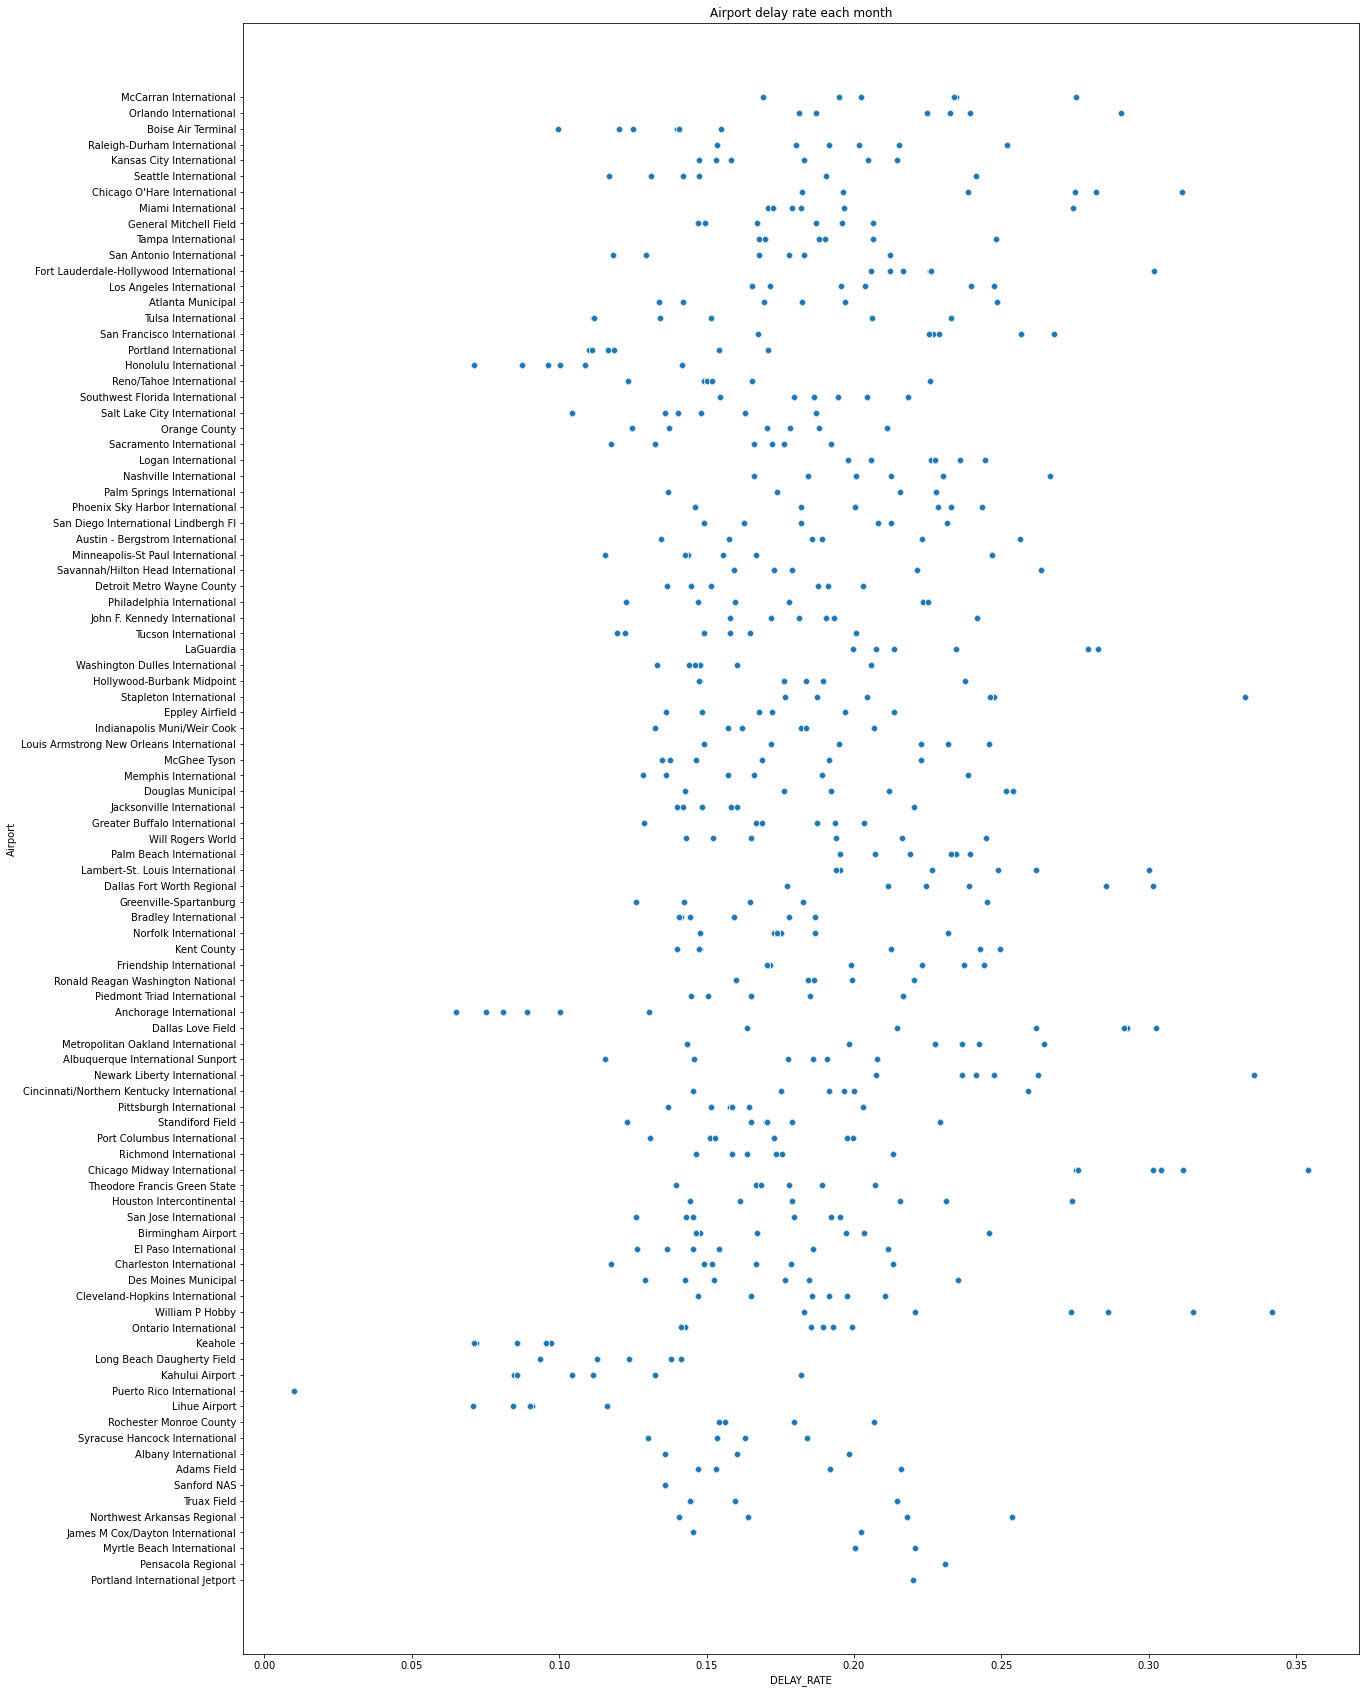

In [38]:
import warnings
warnings.filterwarnings("ignore")

# Select only required columns
df_air=df[['MONTH',  'DEP_DEL15', 'DEPARTING_AIRPORT', 'AIRPORT_FLIGHTS_MONTH']]

# Create a new index
df_air.set_index(['MONTH', 'DEPARTING_AIRPORT'],inplace=True) 

# Gropuby
df_air['AIRPORT_DELAYS_MONTH']=df_air.groupby(['MONTH','DEPARTING_AIRPORT'])['DEP_DEL15'].sum() 

# Drop the column as it is not needed
df_air.drop(columns=['DEP_DEL15'],inplace=True)

# Calculate the delay rate column
df_air['DELAY_RATE']=df_air['AIRPORT_DELAYS_MONTH']/df_air['AIRPORT_FLIGHTS_MONTH']

# Reset index
df_air.reset_index(inplace=True)

# Scatter Plot
plt.figure(figsize=(20,30))
sns.scatterplot(y='DEPARTING_AIRPORT',x='DELAY_RATE',data=df_air)
plt.title('Airport delay rate each month')
plt.ylabel('Airport')
plt.ylabel('Delay Rate')
plt.show()

### The airport with least delay rates
+ Honalulu International 
+ Anchorage International
+ Keahole
+ Lihue

# Analysis of how Weather affects Flght Delays: Snow and Temperature at Airports.

In [39]:
# Slice the data when only snow is atleast 0.1 inch
df_snow=df[df['SNOW']>0.1]
print(df_snow.shape)

# Sort the dataset in descending order
df_snow.sort_values(by=['SNOW'],ascending=False).head()


(94214, 27)


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TMAXBIN
307462,1,5,1,1700-1759,2,6,4,100,JetBlue Airways,1740,23463,295,204691,3190369,0.000160,0.000127,10,Greater Buffalo International,42.941,-78.736,John F. Kennedy International,0.87,17.2,5.9,28.0,18.57,20-29
307416,1,5,0,0001-0559,2,1,5,100,JetBlue Airways,1740,23463,295,204691,3190369,0.000160,0.000127,14,Greater Buffalo International,42.941,-78.736,NONE,0.87,17.2,5.9,28.0,18.57,20-29
307430,1,5,0,0800-0859,2,2,3,100,JetBlue Airways,1740,23463,295,204691,3190369,0.000160,0.000127,10,Greater Buffalo International,42.941,-78.736,John F. Kennedy International,0.87,17.2,5.9,28.0,18.57,20-29
307429,1,5,0,1800-1859,9,2,5,162,JetBlue Airways,1740,23463,295,204691,3190369,0.000160,0.000127,14,Greater Buffalo International,42.941,-78.736,Fort Lauderdale-Hollywood International,0.87,17.2,5.9,28.0,18.57,20-29
307428,1,5,1,0600-0659,5,2,9,128,American Airlines Inc.,1740,75506,119,204691,11744595,0.000098,0.000177,14,Greater Buffalo International,42.941,-78.736,Louis Armstrong New Orleans International,0.87,17.2,5.9,28.0,18.57,20-29


We divided the amount of precipitation into five categories: precipitation up to 1 mm,
1 to 4 mm 6 to 9 10 to 14 and 15 to 19. Next, for each category of precipitation, we determine the number of delays.

In [40]:

import warnings
warnings.filterwarnings("ignore")

# Bin the snow ranges
bins=[0.1,1,5,10,15,20]

# Create labels for snow ranges
labels=['Less than 1','1-4','6-9','10-14','15-19']

# Add the new column for snow range
df_snow['SNOW_RANGE']=pd.cut(df_snow['SNOW'],bins=bins,labels=labels)

# Groupby snow range
df_snow_range=df_snow[['DEP_DEL15']].groupby(df_snow['SNOW_RANGE']).sum()
df_snow_range.head()


,DEP_DEL15
SNOW_RANGE,
Less than 1,14265
1-4,13280
6-9,1670
10-14,1
15-19,28


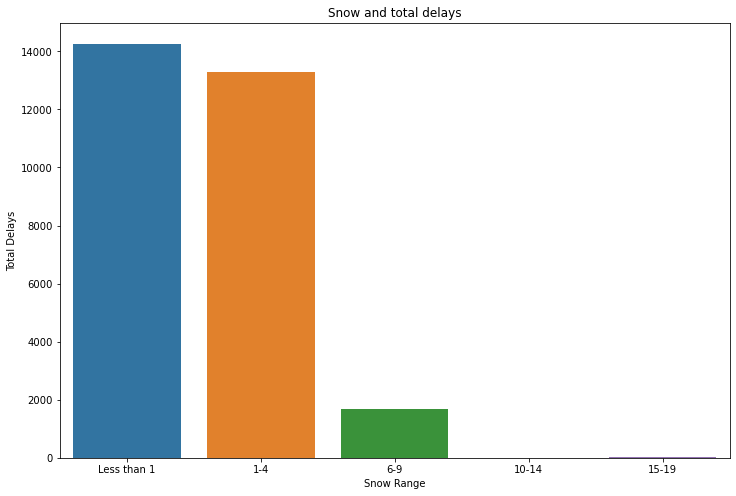

In [43]:
# Reset index
df_snow_range.reset_index(inplace=True)

# Plot
plt.figure(figsize=(12,8))
plt.title('Snow and total delays')
sns.barplot(data=df_snow_range,x='SNOW_RANGE',y='DEP_DEL15')
plt.xlabel('Snow Range')
plt.ylabel('Total Delays')
plt.show()

The results surprise us. As we can see that the greatest number of delays occurs where the snow is less than 1 millimeter of precipitation. This can be explained by the quality of the database sampling, or indeed the ground services of airports for snow removal work better and the amount of snowfall does not cause delays. Therefore, we further study the temperature effect on delayed flights.

# Analysis of how temperature affects flight delays

We broke the temperature series into 12 conditional categories of 10 degrees Fahrenheit each starting with temperatures below zero and determine which category has the most delays

In [44]:
import warnings
warnings.filterwarnings("ignore")

# Bin the tempearture into ranges
bins=[-10,0,10,20,30,40,50,60,70,80,90,100,110,120]

# Create labels for temp ranges
labels=['Less than 0','1-9', '10-19','20-29', '30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119']

# Add the new column for temp ranges
df['TMAXBIN']= pd.cut(df['TMAX'],bins=bins,labels=labels)

# Groupby temp range
df_tmax=df[['DEP_DEL15']].groupby(df['TMAXBIN']).sum()
df_tmax.head()

,DEP_DEL15
TMAXBIN,
Less than 0,51
1-9,2214
10-19,7106
20-29,15625
30-39,44762


In [45]:
# Reste index
df_tmax.reset_index(inplace=True)
df_tmax


,TMAXBIN,DEP_DEL15
0,Less than 0,51
1,1-9,2214
2,10-19,7106
3,20-29,15625
4,30-39,44762
5,40-49,56217
6,50-59,78344
7,60-69,115524
8,70-79,130546
9,80-89,134415


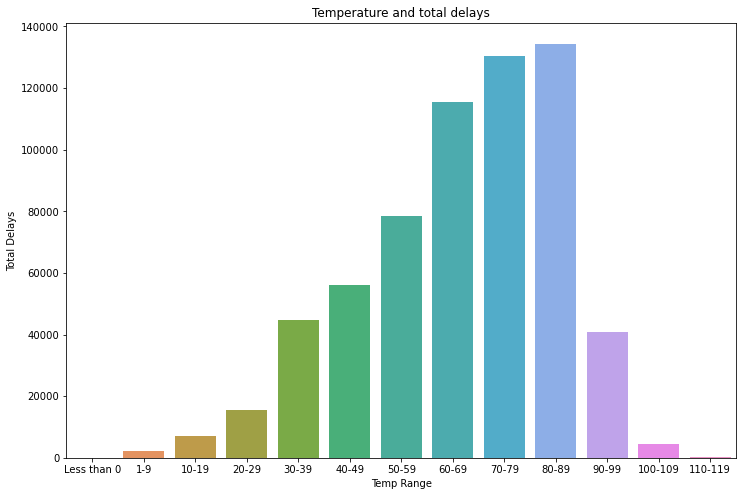

In [46]:
# Plot Temp vs Total delays
plt.figure(figsize=(12,8))
plt.title('Temperature and total delays')
sns.barplot(data=df_tmax,x=df_tmax['TMAXBIN'],y='DEP_DEL15')
plt.xlabel('Temp Range')
plt.ylabel('Total Delays')
plt.show()

From the above analysis, it is clear that the most delays occur at temperatures between 60 and 90 degrees Fahrenheit, which corresponds to normal average and elevated temperatures. This has nothing to do with the cold season, but rather with the hot climate and the need for technological cooling systems. Due to the large number of different indications, we will do a study of the overall correlation of the data among themselves. This will show which factors have the greatest impact on flight delays.

# Developed a Chart of the Correlation Matrix

In [47]:
# Correlation
df.corr()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
MONTH,1.000000,0.023643,0.040731,0.000924,0.039197,0.033723,-0.004310,0.059408,0.074022,0.033358,-0.007574,-0.004718,0.007161,-0.003827,0.001439,0.023197,-0.000349,0.044708,-0.109483,-0.158465,0.630885,-0.041475
DAY_OF_WEEK,0.023643,1.000000,0.009906,0.016474,-0.035470,-0.033380,0.010946,-0.000034,-0.003231,-0.001376,-0.000035,-0.004366,0.001165,0.002057,-0.005884,-0.013088,-0.008528,0.034284,0.017247,-0.008357,0.037058,-0.009799
DEP_DEL15,0.040731,0.009906,1.000000,0.013338,0.120893,0.012521,0.012054,0.029641,0.013414,0.016280,0.026813,0.009065,-0.001133,-0.018904,0.004854,-0.002600,0.025339,0.094071,0.051001,0.026092,0.000600,0.049190
DISTANCE_GROUP,0.000924,0.016474,0.013338,1.000000,-0.241943,-0.036893,0.448284,-0.018821,-0.005191,-0.039235,0.033944,0.125536,0.165780,0.267288,-0.139258,-0.014028,-0.159175,-0.014547,0.000811,-0.007383,0.011211,0.015949
SEGMENT_NUMBER,0.039197,-0.035470,0.120893,-0.241943,1.000000,0.018491,-0.203065,0.045340,0.028157,0.058515,0.027181,-0.058557,-0.098640,-0.182867,0.074710,-0.032928,-0.067626,-0.017546,-0.020135,-0.010295,0.031577,-0.023245
CONCURRENT_FLIGHTS,0.033723,-0.033380,0.012521,-0.036893,0.018491,1.000000,-0.052726,0.846999,-0.043311,0.580244,0.808976,-0.015790,0.115226,0.100701,0.041355,0.012782,0.126291,-0.012549,-0.023994,-0.041452,0.021836,0.039132
NUMBER_OF_SEATS,-0.004310,0.010946,0.012054,0.448284,-0.203065,-0.052726,1.000000,0.002852,0.312848,0.163191,0.061549,0.560052,0.204095,0.346213,-0.108040,-0.140392,-0.161370,-0.015875,-0.009935,-0.018640,0.074887,-0.028063
AIRPORT_FLIGHTS_MONTH,0.059408,-0.000034,0.029641,-0.018821,0.045340,0.846999,0.002852,1.000000,-0.016906,0.650427,0.967644,0.017032,0.141447,0.103858,0.032196,0.011141,0.099857,0.000286,-0.016700,-0.048221,0.036237,0.048527
AIRLINE_FLIGHTS_MONTH,0.074022,-0.003231,0.013414,-0.005191,0.028157,-0.043311,0.312848,-0.016906,1.000000,0.230069,-0.008641,0.900544,-0.001983,-0.076280,0.160636,-0.030403,-0.077140,-0.004571,-0.017253,-0.036220,0.080397,-0.039498
AIRLINE_AIRPORT_FLIGHTS_MONTH,0.033358,-0.001376,0.016280,-0.039235,0.058515,0.580244,0.163191,0.650427,0.230069,1.000000,0.642073,0.292921,0.139423,0.129959,0.116407,-0.069714,0.071826,0.010969,-0.025909,-0.043282,0.071654,-0.005433


This table shows the relationship of 1 factor from all the others by row and column.

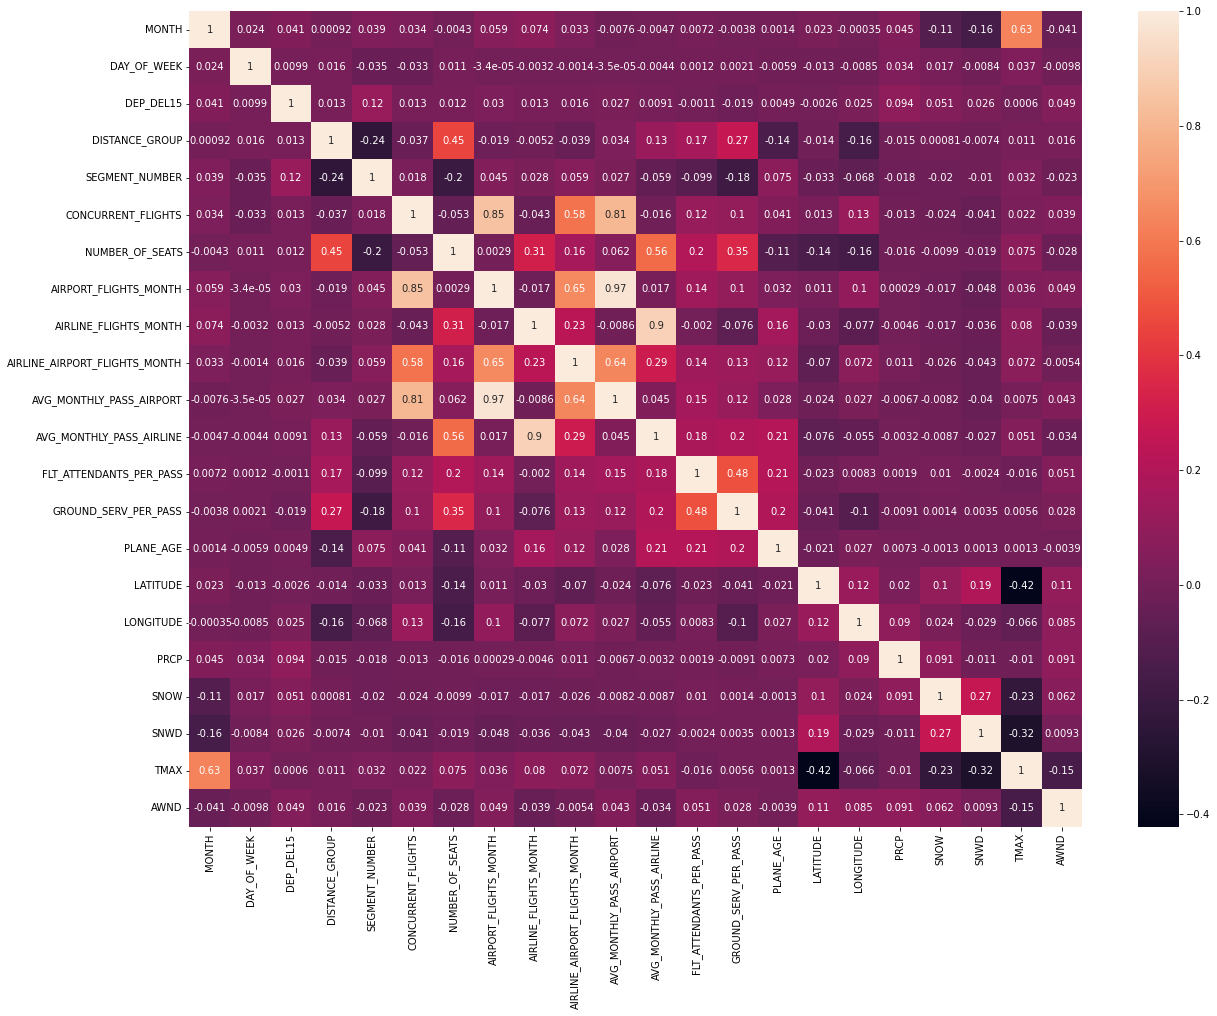

In [48]:
# Plot the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Analysis of effect of Segment number on flight delays

According to the study above, the flight Segment Number has the greatest impact on the delayed flights in our database. According to Wikipedia, "In the aviation industry , a flight number or flight designator is a code for an airline service consisting of two-character airline designator and a 1 to 4 digit number. For example, "BA 98" is a British Airways service from Toronto-Pearson to London-Heathrow. A service is called "direct" if it is covered by a single flight number, regardless of the number of stops or equipment changes. For example, "WN 417" flies from Jacksonville to Baltimore to Oakland to Los Angeles on Southwest Airlines. A given flight segment may have multiple flight numbers on different airlines under a code-sharing agreement. Strictly speaking, the flight number is just the numerical part, but it is commonly used for the entire flight designator".  

In [49]:
# Group by Segment number
seg_n=df.groupby(['SEGMENT_NUMBER' ])['DEP_DEL15'].sum()

# Convert series to dataframe
df_seg=pd.DataFrame(seg_n)
df_seg.head()

# Reset index and sort in descending order by total delays
df_seg.reset_index(inplace=True)
df_seg.sort_values(by='DEP_DEL15',ascending=False)

,SEGMENT_NUMBER,DEP_DEL15
1,2,125602
3,4,123776
2,3,122877
0,1,91303
4,5,79526
5,6,56355
6,7,19761
7,8,9517
8,9,1231
9,10,324


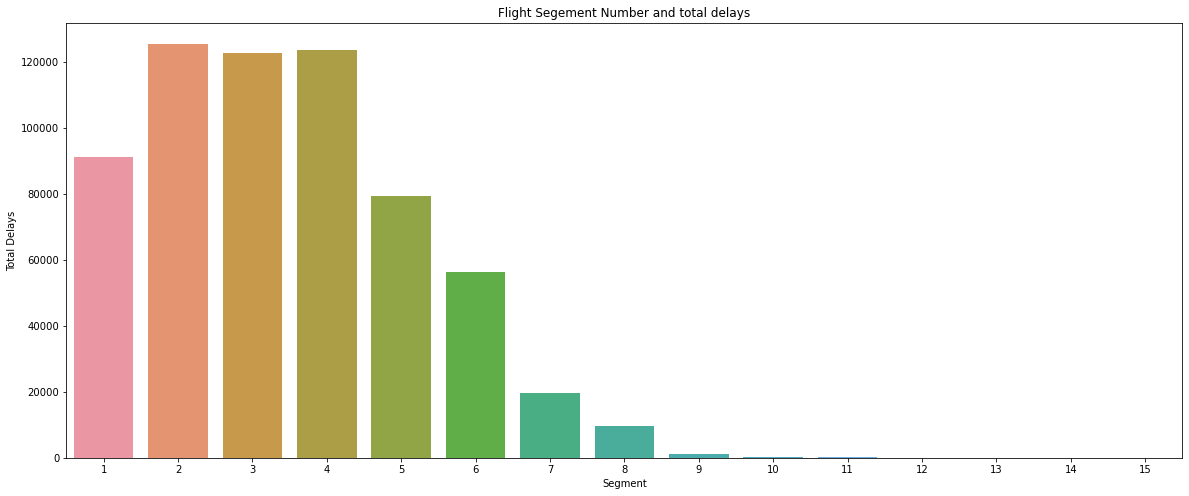

In [50]:
# Plot total delays vs Segment number
plt.figure(figsize=(20,8))
plt.title('Flight Segement Number and total delays')
sns.barplot(data=df_seg,x='SEGMENT_NUMBER',y='DEP_DEL15')
plt.xlabel('Segment')
plt.ylabel('Total Delays')
plt.show()

The data in the table shows that most delays occur in segments 2-4, which is explained by the number of delays in connecting flights between airlines occurring at different airports. This data suggests that the majority of delays are caused by airlines that do not manage multi-stage flights well enough. They need to improve the quality of work with other air carriers and airports that are in the 1 flight chain.

# Conclusion


We researched сlassification dataset with detailed airline, weather, airport and employment information and delay reasons for multiclass applications. and the impact of various factors on flight delays. Initially, the annual Database data was more than 6.4 millon rows, so we reduced it to half a year. We use python in our study because it is most efficient when dealing with large amounts of data. Our findings showed how various factors affect flight delays, in particular that the most important factor affecting the delay is the segments, they showed what time it all happens:

+ Southwest Airlines Co has the most delays
+ For the first half of the studied database, the largest number of delays occurred in June (135 871) and then in May (113530), whichis almost 15000 more than in the rest of the months
+ Most flight delays occurred on Thursday and on Friday, however, the difference between other days of the week in delays is negligible
+ Most often, delays occurred during flights between 14:00 and 21:00. The max delays are 53145  between 6.00 PM and 7.00 PM.
+ Most delays occur at Chicago O'Hare International Airport (38,804). Further into the top three are Atlanta and Dallas airports. Their number of delays is from 34093, the following airports lag behind them by about 7,000 happens.
+ The heaviest traffic at the airport of Atlanta airport.
+ The presence of snow and cold weather does not affect the number of delays. This is due to the fact that the air service lays extra time during weather changes in the cold season.
+ The Segment number is the main factor influencing flight delays.
+ According to our studies, segment numbers 2,3,4 have the largest number of delays and it is more than 120.000. Segment numbers over 8 have a negligible number of delays.

As a next step in this study, we may suggest deleting the outlier segment number data and recreating the study.